In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras import layers

In [18]:
lyricsdataframe=pd.read_csv('./finallyrics1.csv',error_bad_lines=False)
lyricsdataframe

,Unnamed: 0,Artist,Title,Mood,Lyrics
0,0,Usher,There Goes My Baby,relaxed,There goes my baby\n(Ooh girl look at you)\nYo...
1,1,Da'Ville,On My Mind,relaxed,I'm thinking about you\nGirl I miss you\nBaby ...
2,2,Rihanna,Rockstar 101,relaxed,I told ya\nI told ya\nI told ya\nBaby\nBaby\n\...
3,3,J. Holiday,Bed,relaxed,(J. Holiday: speaking)\nJ. Holiday\nL.O.S.\nAy...
4,4,Morgan Heritage,Don't Haffi Dread,angry,"Yeah, yeah, yeah - ragga so ragga\n\nYou don't..."
...,...,...,...,...,...
2572,2572,Slayer,Fight Till Death,angry,Metal and men clash once more to the end\nWarr...
2573,2573,Anthrax,Among the Living,angry,"Disease, disease\nSpreading the disease\nWith ..."
2574,2574,Opeth,Heir Apparent,sad,Slow days\nSlow words\nSlow lies\nSlow ends\n\...
2575,2575,Sepultura,Territory,angry,Unknown man\nSpeaks to the world\nSucking your...


In [19]:
X=lyricsdataframe['Lyrics']
X

0       There goes my baby\n(Ooh girl look at you)\nYo...
1       I'm thinking about you\nGirl I miss you\nBaby ...
2       I told ya\nI told ya\nI told ya\nBaby\nBaby\n\...
3       (J. Holiday: speaking)\nJ. Holiday\nL.O.S.\nAy...
4       Yeah, yeah, yeah - ragga so ragga\n\nYou don't...
                              ...                        
2572    Metal and men clash once more to the end\nWarr...
2573    Disease, disease\nSpreading the disease\nWith ...
2574    Slow days\nSlow words\nSlow lies\nSlow ends\n\...
2575    Unknown man\nSpeaks to the world\nSucking your...
2576    Sweet Leilani\nHeavenly flower\nNature fashion...
Name: Lyrics, Length: 2577, dtype: object

In [20]:
Y=lyricsdataframe['Mood']
Y

0       relaxed
1       relaxed
2       relaxed
3       relaxed
4         angry
         ...   
2572      angry
2573      angry
2574        sad
2575      angry
2576    relaxed
Name: Mood, Length: 2577, dtype: object

In [26]:
laen=LabelEncoder()
y=laen.fit_transform(Y)
y=np_utils.to_categorical(y)
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [29]:
def tokkk(x,max_w,max_l):
    lyricstok = Tokenizer(num_words=max_w)
    lyricstok.fit_on_texts(x)
    seque = lyricstok.texts_to_sequences(x)
    sequen_matrix = sequence.pad_sequences(seque,maxlen=max_l)
    return sequen_matrix

In [31]:
sequences_matrix = tokkk(X_train,550,600)
sequences_matrix.shape

(2061, 600)

In [32]:
max_words = 550
max_len = 600

In [33]:
inp = Input(name='inputs',shape=[max_len])
i = Embedding(max_words,50,input_length=max_len)(inp)
i = LSTM(32)(i)
i = Dense(256, name='FC1')(i)
i = Activation('relu')(i)
i = Dropout(0.2)(i)
i = Dense(4,name='out_layer')(i)
out = Activation('softmax')(i)
model = Model(inputs=inp,outputs=out)

In [34]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [35]:
history=model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,validation_split=0.2)


Train on 1648 samples, validate on 413 samples
Epoch 1/5
1648/1648 [==============================] - 4s 2ms/step - loss: 1.3323 - accuracy: 0.3677 - val_loss: 1.1439 - val_accuracy: 0.5496
Epoch 2/5
1648/1648 [==============================] - 4s 2ms/step - loss: 1.0198 - accuracy: 0.5843 - val_loss: 0.9392 - val_accuracy: 0.5981
Epoch 3/5
1648/1648 [==============================] - 4s 2ms/step - loss: 1.0681 - accuracy: 0.6280 - val_loss: 0.8623 - val_accuracy: 0.6489
Epoch 4/5
1648/1648 [==============================] - 4s 2ms/step - loss: 0.7782 - accuracy: 0.7051 - val_loss: 0.7781 - val_accuracy: 0.7046
Epoch 5/5
1648/1648 [==============================] - 4s 2ms/step - loss: 0.6535 - accuracy: 0.7591 - val_loss: 0.7545 - val_accuracy: 0.6707


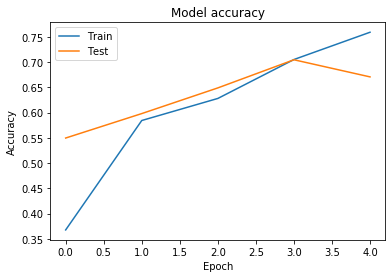

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()